In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 20


train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_generator = train_datagen.flow_from_directory(
    '../dataset/train',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse'
)

Found 1506 images belonging to 3 classes.


In [7]:
for image_batch , label_batch in train_generator:
    print(image_batch.shape)
    
    break

(32, 256, 256, 3)


In [8]:

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

validation_generator = train_datagen.flow_from_directory(
    '../dataset/val',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse')

Found 215 images belonging to 3 classes.


In [9]:

test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_generator = train_datagen.flow_from_directory(
    '../dataset/test',
    target_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = 32,
    class_mode = 'sparse')

Found 431 images belonging to 3 classes.


In [28]:
import os
class_names = os.listdir('../dataset/test')
class_names

['Potato___healthy', 'Potato___Late_blight', 'Potato___Early_blight']

In [10]:
#ceating the model
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3


model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax')

])

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-04-02 12:02:08.361827: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss =tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])

In [13]:
model.fit(
    train_generator,
    steps_per_epoch =  47,
    batch_size = 32,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose = 1,
    epochs = EPOCHS
)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4486 - loss: 0.9605 - val_accuracy: 0.4635 - val_loss: 0.9033
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 43s 939ms/step - accuracy: 0.3125 - loss: 0.8914

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.3125 - loss: 0.8914 - val_accuracy: 0.4479 - val_loss: 0.9071
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.6268 - loss: 0.8238 - val_accuracy: 0.8021 - val_loss: 0.5284
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9062 - loss: 0.3147 - val_accuracy: 0.7812 - val_loss: 0.5712
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.7763 - loss: 0.5781 - val_accuracy: 0.6875 - val_loss: 0.6819
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6875 - loss: 0.7260 - val_accuracy: 0.7448 - val_loss: 0.5887
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 44s 939ms/step - accuracy: 0.8033 - loss: 0.4661 - val_accuracy: 0.8281 - val_loss: 0.4185
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.8750 - loss: 0.3685 - val_accuracy: 0.8490 - val_loss: 0.3457
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 46s 960ms/step - accuracy: 0.8708 - loss: 0.3047 - val_accuracy: 0.8854 - val_loss: 

In [16]:
scores = model.evaluate(test_generator)

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.8979 - loss: 0.2558


In [26]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [18]:
history = model.history
history

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Traning and Validation Accuracy')

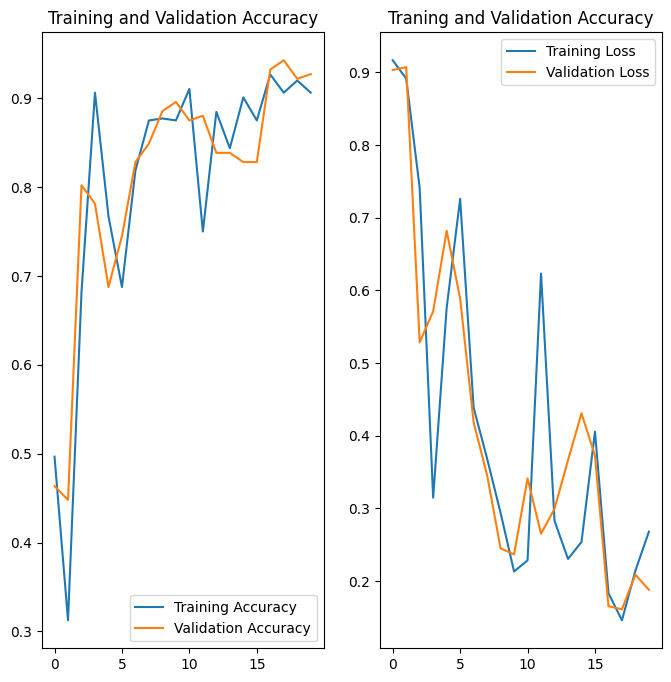

In [22]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc , label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation Accuracy')
plt.legend(loc ='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss , label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title("Traning and Validation Accuracy")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


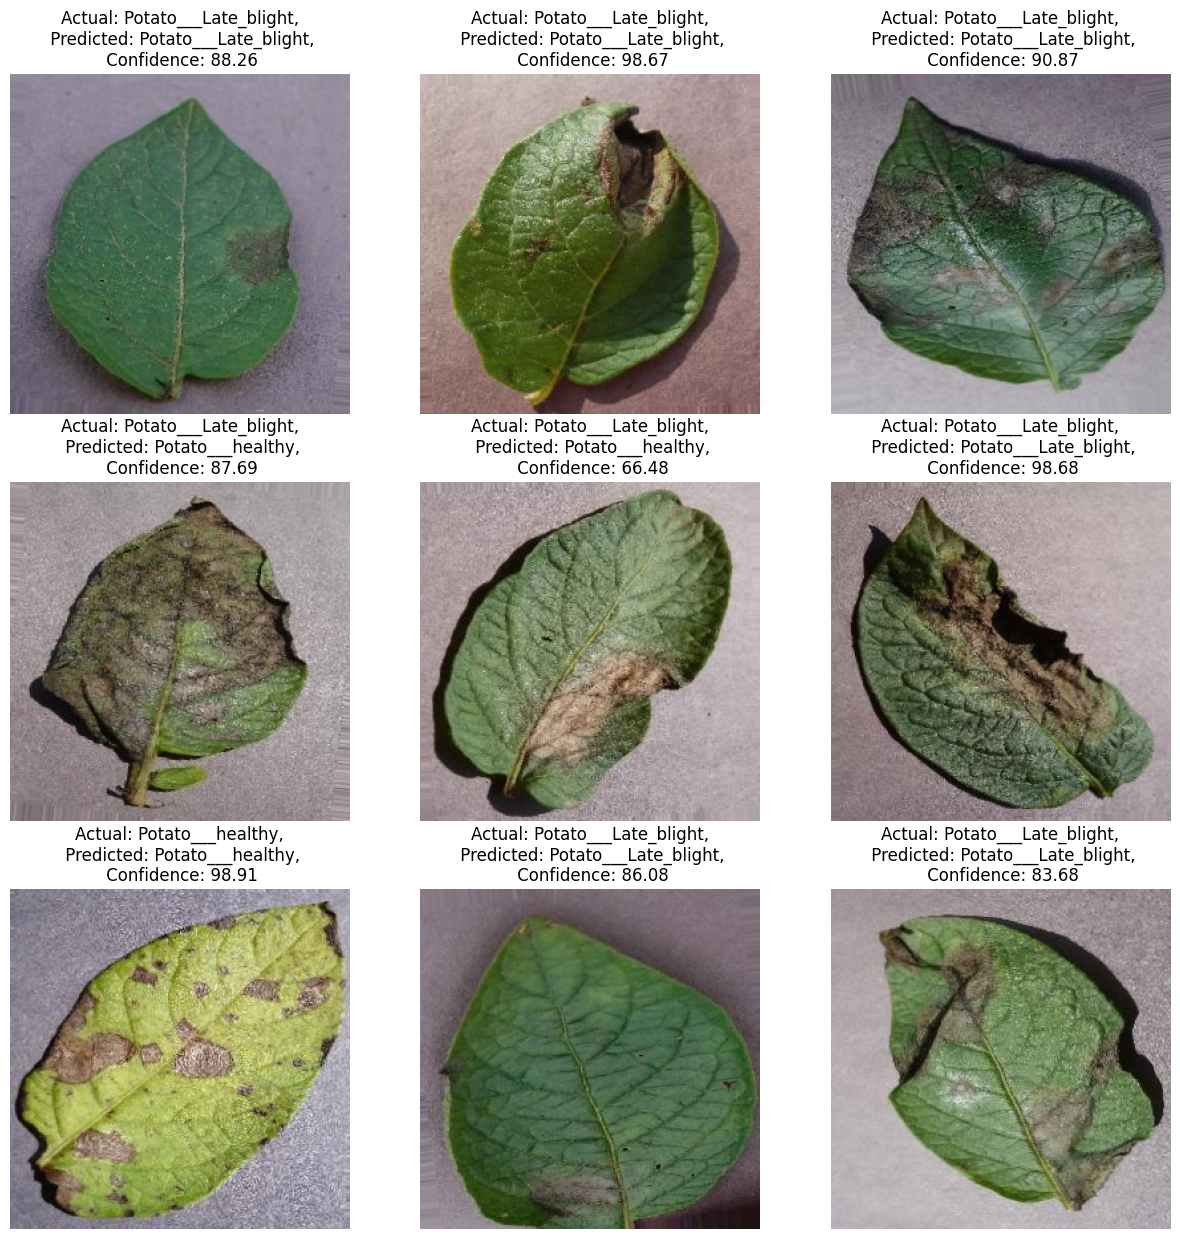

In [31]:
import numpy as np


def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

plt.figure(figsize=(15,15))
for images,labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3,3,i + 1)
        plt.imshow(images[i])

        predicted_class, confidense = predict(model,images[i])

        actual_class = class_names[int(labels[i])]

        plt.title(f"Actual: { actual_class},\n Predicted: {predicted_class},\n Confidence: {confidense}")

        plt.axis('off')
    break

# 

In [33]:
# Saving the model
model.save('../potatoes.h5')